In [15]:
import json
from collections import OrderedDict

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud

from sklearn.feature_extraction.text import CountVectorizer

In [2]:
with open('Daten/Unternehmen_preprocessed.json', 'r') as rf:
    desc = json.load(rf)

In [4]:
for d in desc:
    if ' the ' in d['explicit_lemmatization']:
        print(d)
        break

# Create Vectorizer to count words

## Functions

In [5]:
def counter(word, dic):
    if word in dic:
        dic[word] += 1
    else:
        dic[word] = 1

## Create data

In [6]:
docs = [b['explicit_lemmatization'] for b in desc]

In [7]:
sectors = set()
for sector in desc:
    sectors.add(sector['sector'])

## Counter

Define number of words to show

In [8]:
n_words = 15

In [9]:
pd_df = pd.DataFrame()
cloud_dict = {}

for sector in sectors:
    docs = [b['explicit_lemmatization'] for b in desc if b['sector'] == sector]
    count_dic = {}
    data = {'Word': [], 'Value': []}
    
    for text in docs:
        words = text.split(' ')
        for word in words:
            counter(word, count_dic)

    sort = OrderedDict(sorted(count_dic.items(), key=lambda x: x[1], reverse = True))
    cloud_dict[sector] = sort
    
    #print(sector)
    for i, key in enumerate(sort):
        data['Word'].append(key)
        data['Value'].append(sort[key])       
        #print(key, sort[key])
        if i == n_words:
            break
            
    df = pd.DataFrame(data)
    pd_df = pd.concat([pd_df, df], axis = 1)
    #print('\n')
    

In [12]:
pd_df.columns = pd.MultiIndex.from_product([sectors, ['Word', 'Count Value']])

In [13]:
pd.set_option('display.max_columns', None)
pd_df

Consumer Cyclical              Real Estate                  Utilities  \
                Word Count Value         Word Count Value           Word   
0            company        2352       estate         657        company   
1            product        1815         real         651            gas   
2            operate        1485     property         583        operate   
3            service        1000      company         546        service   
4              offer         944   investment         427        natural   
5              store         870      service         351         energy   
6            provide         804   management         289       customer   
7        headquarter         789      operate         264    electricity   
8              brand         777         REIT         229   distribution   
9            segment         754   commercial         227  approximately   
10              sell         750    portfolio         227          power   
11             found         720        asset         219        segment   
12           include         650          own         216       electric   
13            United         605       manage         214   transmission   
14             Japan         579        trust         207          water   
15           vehicle         525  residential         202       facility   

                 Technology               Industrials              \
   Count Value         Word Count Value          Word Count Value   
0          425      service        2861       company        3190   
1          411      company        2831       service        3183   
2          279     solution        2143        system        2078   
3          272      provide        1971       product        2009   
4          237      product        1772       segment        1823   
5          225        offer        1597       provide        1751   
6          217       system        1577         offer        1633   
7          212     software        1143     equipment        1437   
8          199   management        1118   headquarter        1089   
9          196  application        1031       operate        1079   
10         186      include        1009      solution        1001   
11         186  headquarter         970       include         972   
12         151      segment         872         found         907   
13         145     platform         849    management         857   
14         145     customer         794  construction         798   
15         135        datum         730    industrial         797   

     Healthcare             Basic Materials             Financial Services  \
           Word Count Value            Word Count Value               Word   
0       company        3998         company        1340            company   
1       product        2285         product        1279            service   
2     treatment        2122        material         690           business   
3      clinical        1723         segment         539               loan   
4       develop        1676     headquarter         502               fund   
5       disease        1250           offer         480             invest   
6   headquarter        1150         provide         407            product   
7       service        1062        chemical         374            provide   
8       include        1055         include         354         investment   
9       patient        1031            gold         343            operate   
10        trial        1017          locate         342              stock   
11        offer         963           steel         335             market   
12       cancer         924            sell         321              asset   
13      provide         921         operate         315             United   
14  development         893          Canada         303         commercial   
15        Phase         883           found         303          

# Visualization

Wordcloud of the sector Consumer Cyclical: 


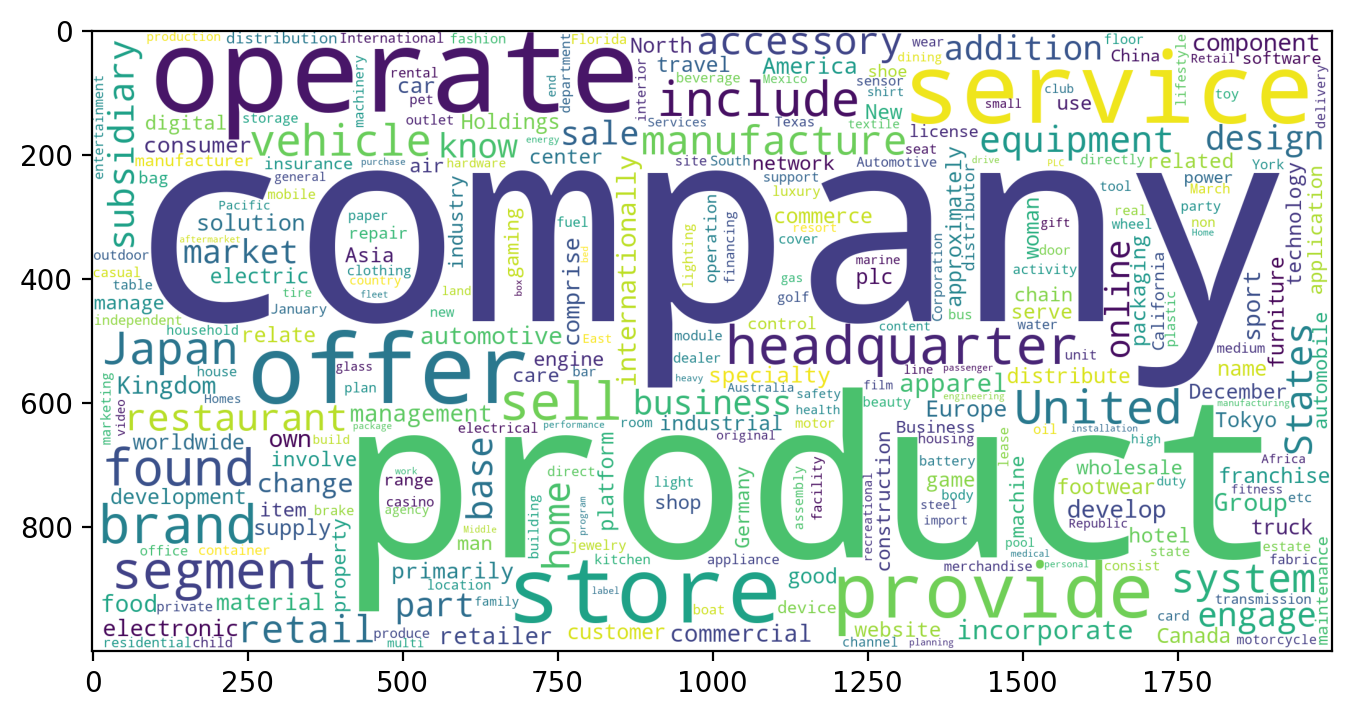

Wordcloud of the sector Real Estate: 


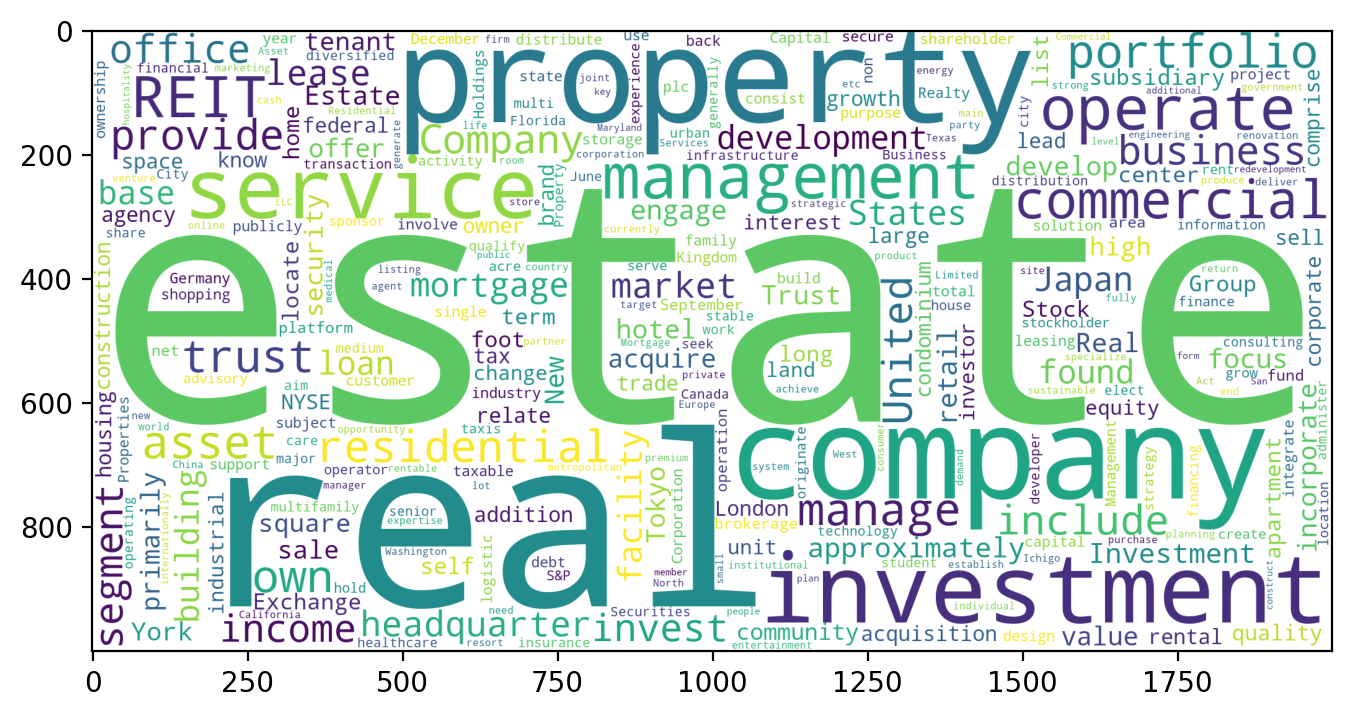

Wordcloud of the sector Utilities: 


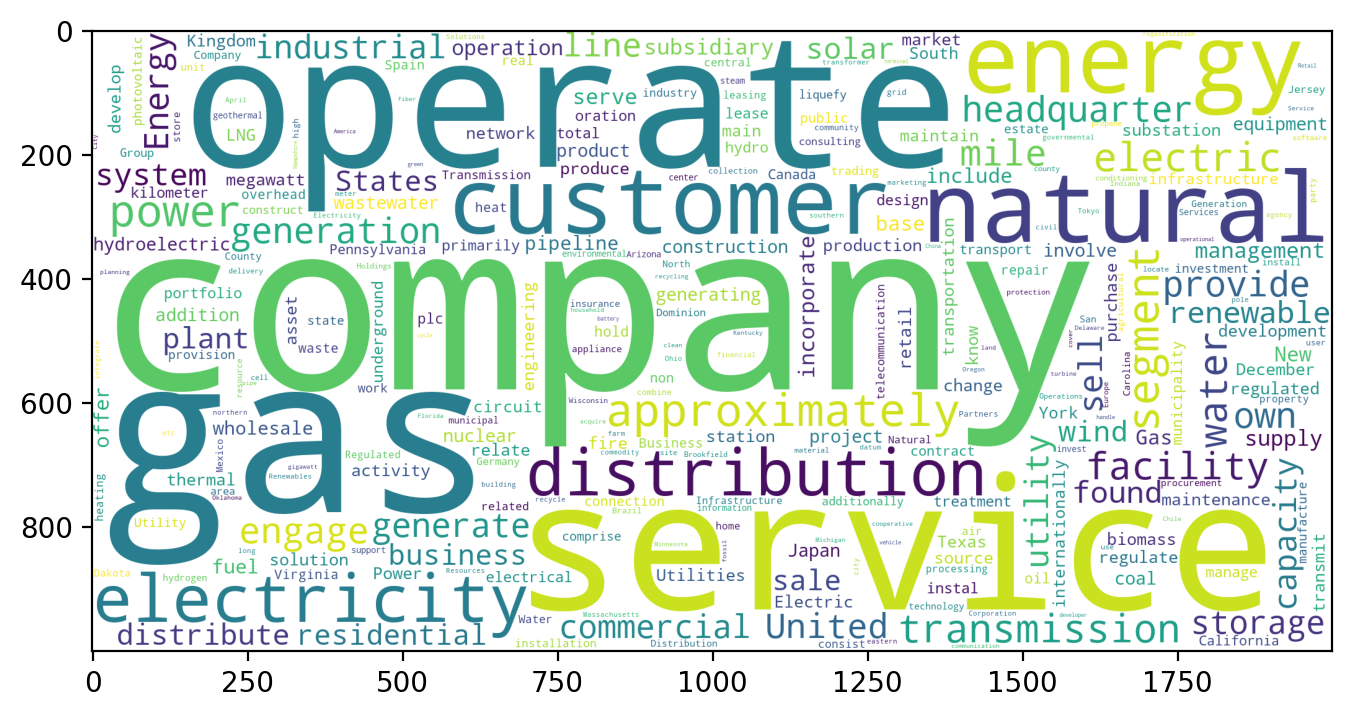

Wordcloud of the sector Technology: 


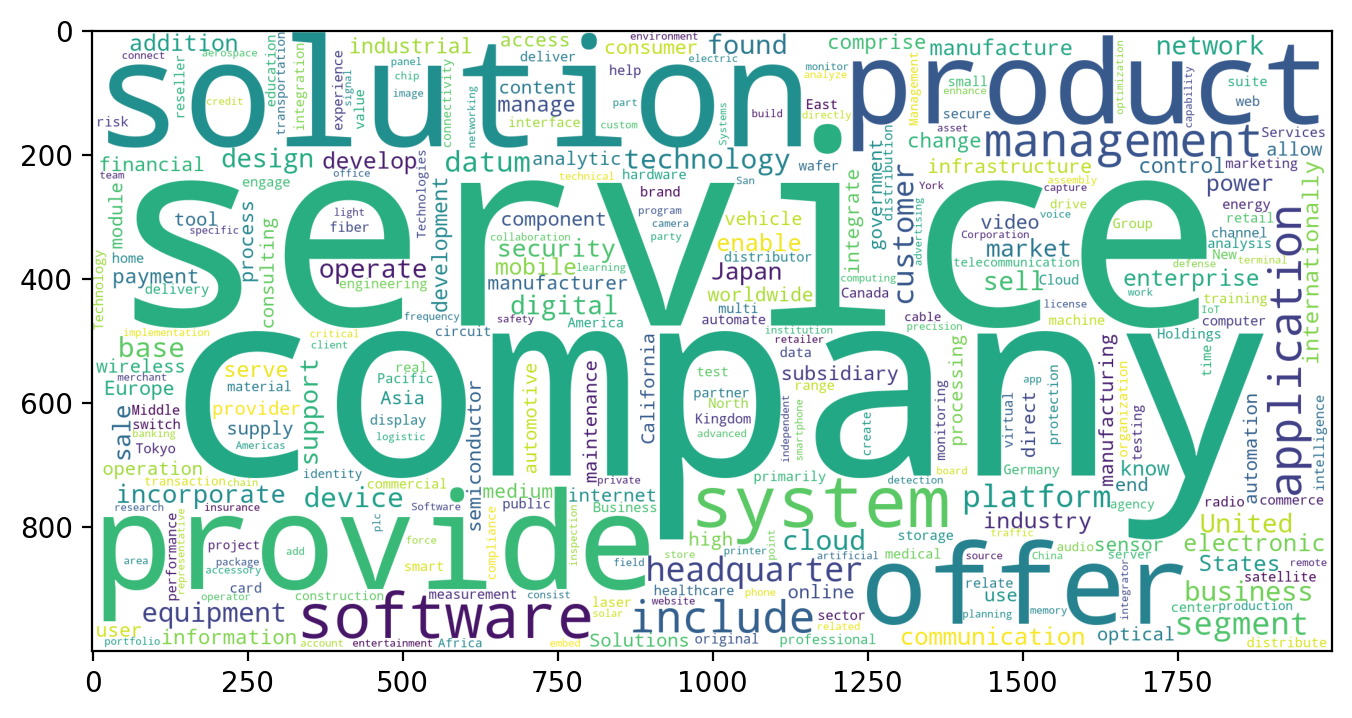

Wordcloud of the sector Industrials: 


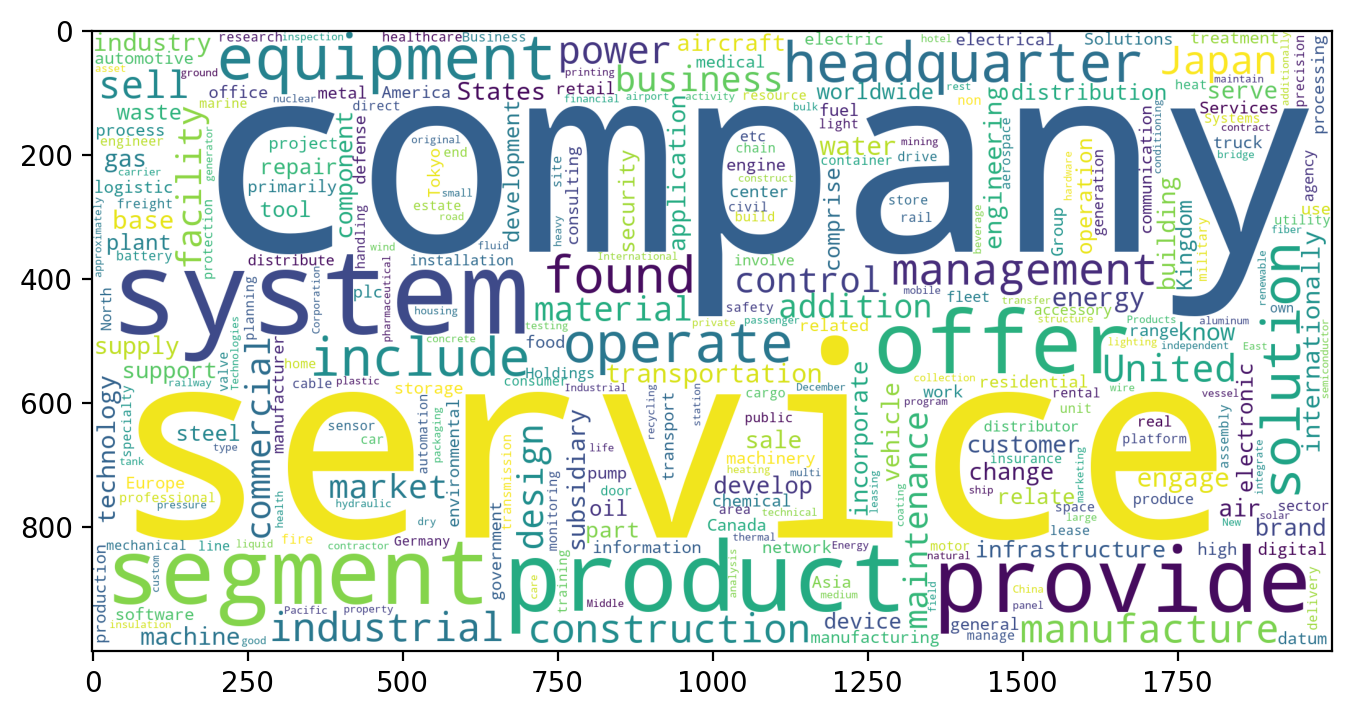

Wordcloud of the sector Healthcare: 


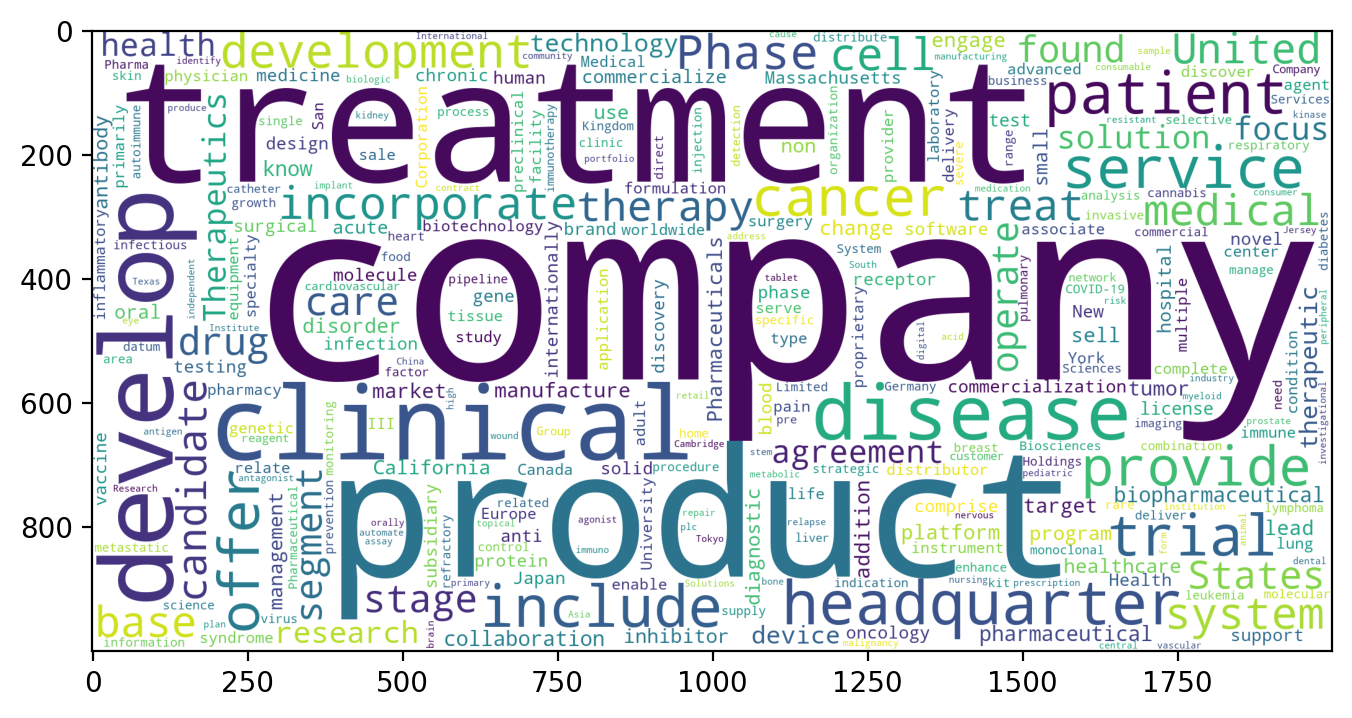

Wordcloud of the sector Basic Materials: 


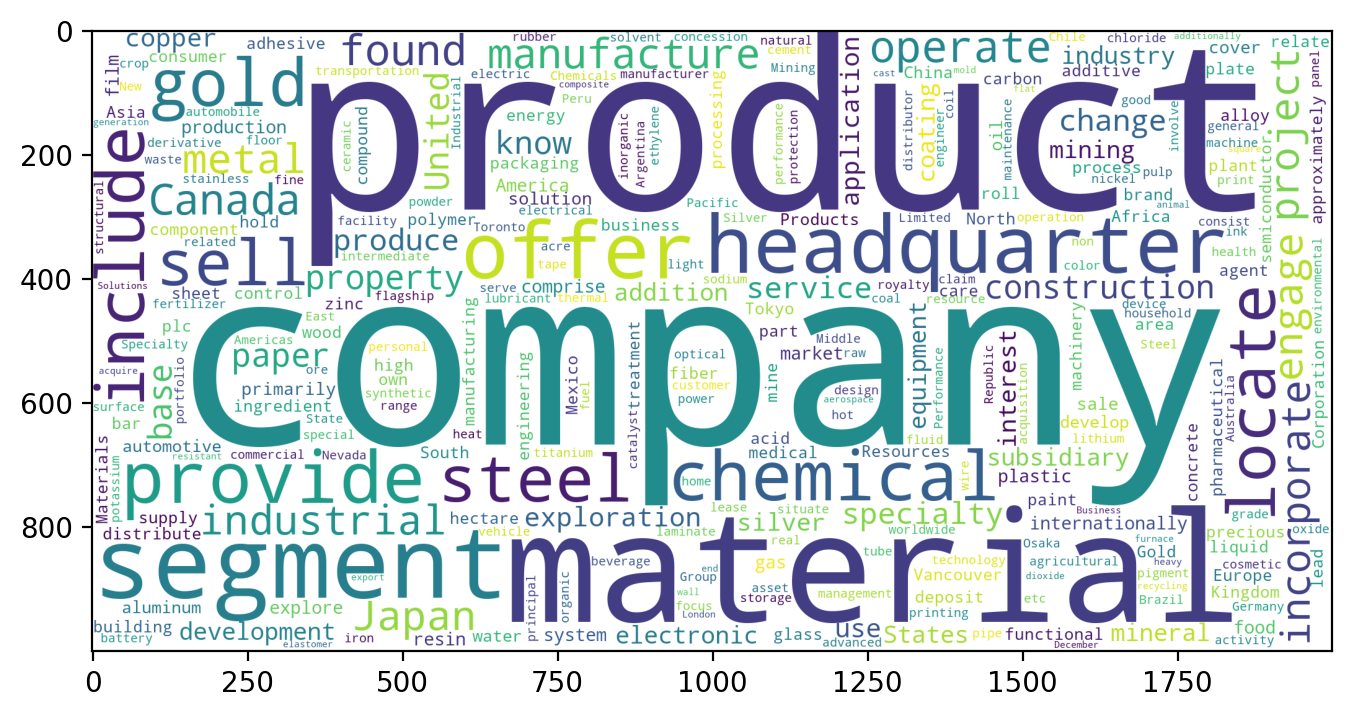

Wordcloud of the sector Financial Services: 


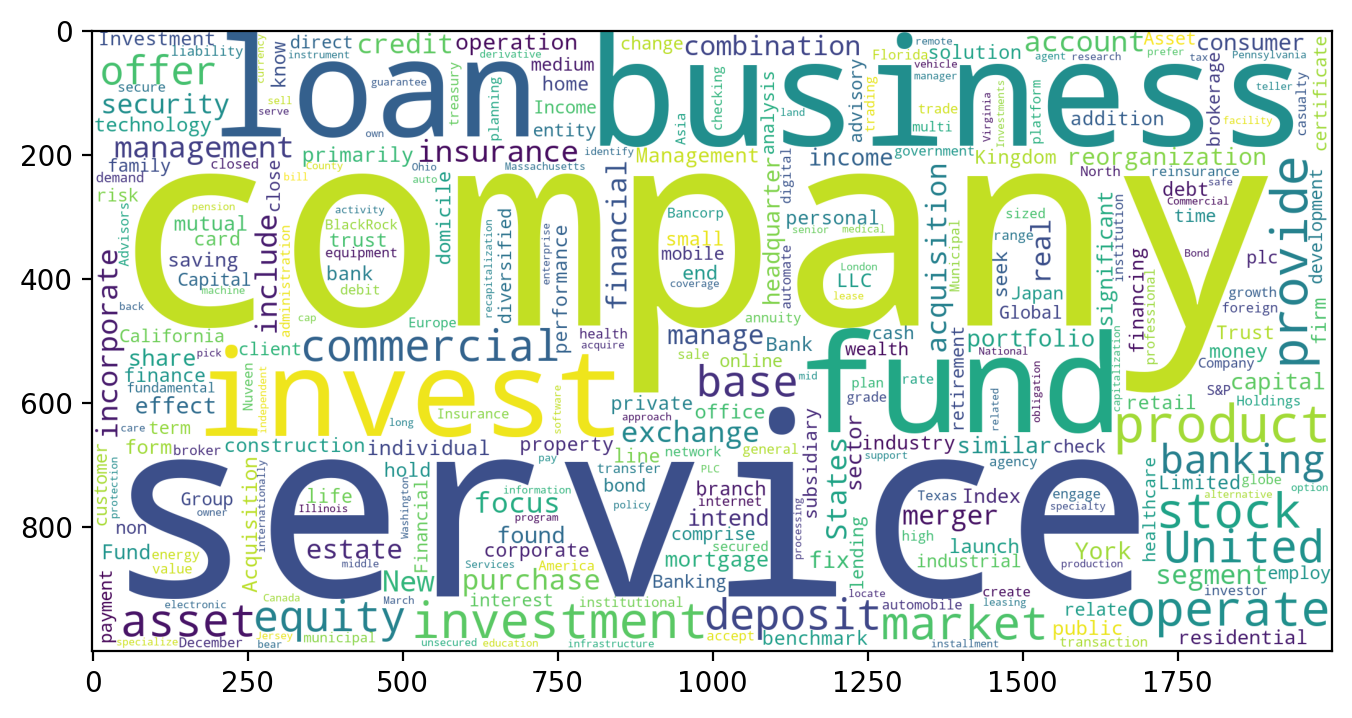

Wordcloud of the sector Energy: 


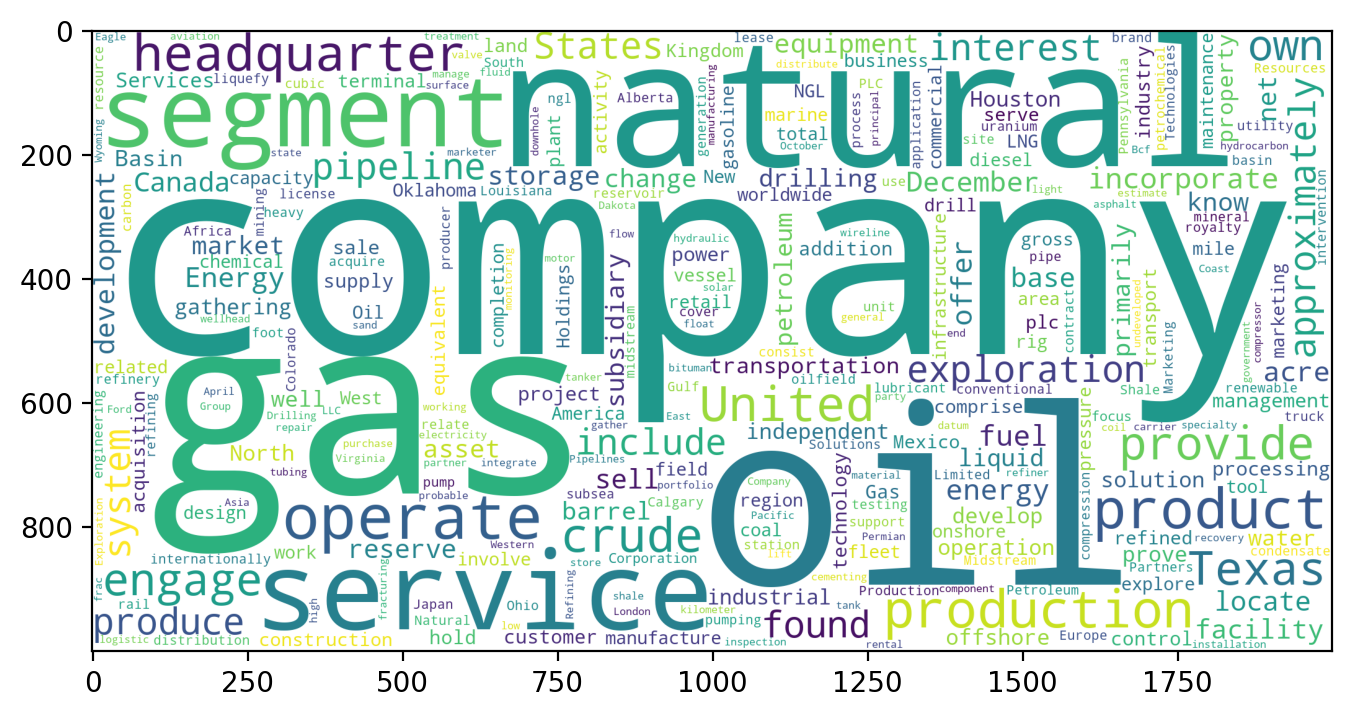

Wordcloud of the sector Consumer Defensive: 


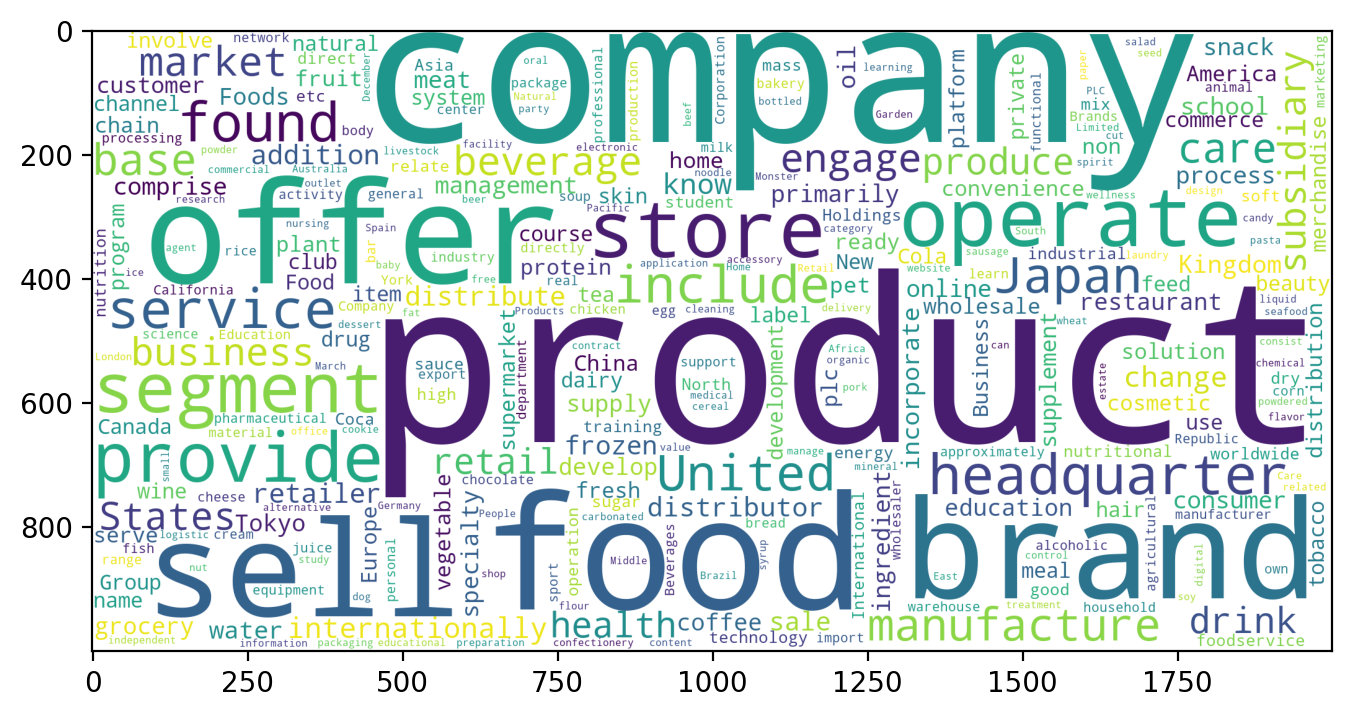

Wordcloud of the sector Communication Services: 


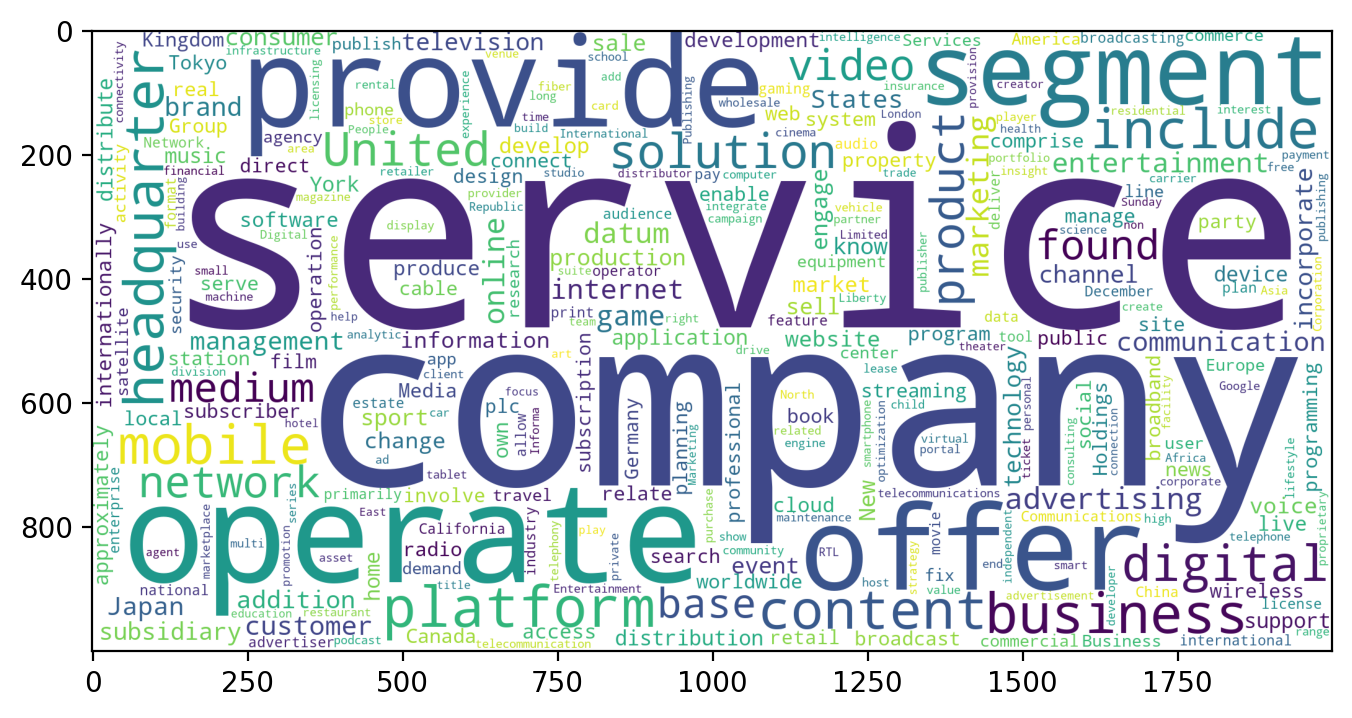

In [18]:
for sector in cloud_dict:
    freq = cloud_dict[sector]
    print(f"Wordcloud of the sector {sector}: ")
    wordcloud = WordCloud(background_color='white', max_words = n_words*20, width = 2000,
                          height = 1000).generate_from_frequencies(freq)
    figure(figsize=(8, 6), dpi=200)
    plt.imshow(wordcloud)
    plt.show()